K Means clustering adalah algoritma unsupervised machine learning yang digunakan untuk pengelompokan data dan pengenalan pola. 

Caranya adalah dengan memilih beberapa titik data awal (k) secara acak, lalu memindah-mindahkannya hingga pengelompokan yang paling ideal ditemukan dengan periterasinya mencari jarak tiap data ke tiap kluster lalu menentukan cluster mana data tersebut masuk dengan memilih cluster terdekat dari setiap data tersebut, lalu tentukan lokasi centroid baru dengan mencari mean pada data yang termasuk ke dalam kluster tersebut, kemudian bandingkan lagi jarak data dengan centroid baru, hentikan hanya jika tidak ada perubahan pada cluster tiap data dengan iterasi sebelumnya. 


Import dulu package yang dipakai

In [80]:
#import dulu package-package yang dipakai untuk operasi dasar dan plotting grafik nantinya.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

kita input data sesuai dengan jurnalnya

In [81]:
data = {
    'Nama': ['Siswa001', 'Siswa002', 'Siswa003', 'Siswa004', 'Siswa005', 'Siswa006', 'Siswa007', 'Siswa008', 'Siswa009', 'Siswa010'],
    'Nilai Raport': [80, 90, 95, 75, 70, 80, 65, 90, 91, 85],
    'Nilai Tes Ujian': [85, 87, 90, 78, 89, 70, 75, 71, 75, 70],
}

Convert data ke dataframe supaya lebih mudah dikelola oleh pandas, dan numpy nantinya

In [82]:
df = pd.DataFrame(data)

kita lihat data data yang kita input

In [83]:
print(df.head())

       Nama  Nilai Raport  Nilai Tes Ujian
0  Siswa001            80               85
1  Siswa002            90               87
2  Siswa003            95               90
3  Siswa004            75               78
4  Siswa005            70               89


beri titik centroid initial tiap clusters, sesuai dengan jurnal demi kemiripan

In [84]:
initial_centers = np.array([
    [95, 90],
    [80, 70],
    [65, 75]
])

kita rumuskan fungsi buat jarak euclideannya 

In [85]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

lalu fungsikan tiap data point ke klaster terdekat dengan menggunakan fungsi jarak euclidean yang udah kita define sebelumnya

In [86]:
def assign_clusters(data, centers):
    clusters = []
    for index, row in data.iterrows(): #data.iterrows() adalah metode pada DataFrame pandas yang memungkinkan Anda untuk mengiterasi baris-baris DataFrame secara berurutan. Metode ini mengembalikan dua nilai pada setiap iterasi: index: Indeks baris saat ini. row: Series pandas yang berisi data untuk baris saat ini. Misalnya, jika Anda memiliki DataFrame dengan 3 kolom, row akan menjadi Series yang memiliki nilai dari setiap kolom pada baris saat ini. Ini memudahkan Anda untuk mengakses dan memproses setiap baris secara individu.
        distances = [euclidean_distance(np.array([row['Nilai Raport'], row['Nilai Tes Ujian']]), center) for center in centers]
        clusters.append(np.argmin(distances) + 1)  # Add 1 to change biar cluster mulai dari 1 melainkan dari 0
    return clusters

sesuai dengan namanya k-MEANS yang artinya mean / rata rata, kita cari rata rata dari tiap variabel dengan menjumlahkan seluruh hasil dari fungsi jarak euclidean tadi setelah diproses fungsi assign clusters tadi.

In [87]:
def calculate_new_centers(data, clusters, k):
    new_centers = []
    for i in range(1, k + 1):  # Adjust loop to match new cluster labels supaya mengikuti cluster yang dimulai dari 1 bukan 0
        cluster_data = data[data['Cluster'] == i]
        new_center = cluster_data[['Nilai Raport', 'Nilai Tes Ujian']].mean().values
        new_centers.append(new_center)
    return np.array(new_centers)

kita panggil 

In [88]:
df['Cluster'] = assign_clusters(df, initial_centers)

In [89]:
df['C1'] = df.apply(lambda row: euclidean_distance(np.array([row['Nilai Raport'], row['Nilai Tes Ujian']]), initial_centers[0]), axis=1)
df['C2'] = df.apply(lambda row: euclidean_distance(np.array([row['Nilai Raport'], row['Nilai Tes Ujian']]), initial_centers[1]), axis=1)
df['C3'] = df.apply(lambda row: euclidean_distance(np.array([row['Nilai Raport'], row['Nilai Tes Ujian']]), initial_centers[2]), axis=1)

In [90]:
df['Data No'] = df.index + 1
iteration_1 = df[['Data No', 'C1', 'C2', 'C3', 'Cluster']]

In [91]:
new_centers = calculate_new_centers(df, df['Cluster'], 3)

In [92]:
df['Cluster'] = assign_clusters(df, new_centers)

In [93]:
df['C1'] = df.apply(lambda row: euclidean_distance(np.array([row['Nilai Raport'], row['Nilai Tes Ujian']]), new_centers[0]), axis=1)
df['C2'] = df.apply(lambda row: euclidean_distance(np.array([row['Nilai Raport'], row['Nilai Tes Ujian']]), new_centers[1]), axis=1)
df['C3'] = df.apply(lambda row: euclidean_distance(np.array([row['Nilai Raport'], row['Nilai Tes Ujian']]), new_centers[2]), axis=1)

In [94]:
iteration_2 = df[['Data No', 'C1', 'C2', 'C3', 'Cluster']]

In [95]:
new_centers_2 = calculate_new_centers(df, df['Cluster'], 3)

In [96]:
df['Cluster'] = assign_clusters(df, new_centers_2)

In [97]:
df['C1'] = df.apply(lambda row: euclidean_distance(np.array([row['Nilai Raport'], row['Nilai Tes Ujian']]), new_centers_2[0]), axis=1)
df['C2'] = df.apply(lambda row: euclidean_distance(np.array([row['Nilai Raport'], row['Nilai Tes Ujian']]), new_centers_2[1]), axis=1)
df['C3'] = df.apply(lambda row: euclidean_distance(np.array([row['Nilai Raport'], row['Nilai Tes Ujian']]), new_centers_2[2]), axis=1)

In [98]:
iteration_3 = df[['Data No', 'C1', 'C2', 'C3', 'Cluster']]

In [99]:
new_centers_3 = calculate_new_centers(df, df['Cluster'], 3)

In [100]:
df['Cluster'] = assign_clusters(df, new_centers_3)

In [101]:
df['C1'] = df.apply(lambda row: euclidean_distance(np.array([row['Nilai Raport'], row['Nilai Tes Ujian']]), new_centers_3[0]), axis=1)
df['C2'] = df.apply(lambda row: euclidean_distance(np.array([row['Nilai Raport'], row['Nilai Tes Ujian']]), new_centers_3[1]), axis=1)
df['C3'] = df.apply(lambda row: euclidean_distance(np.array([row['Nilai Raport'], row['Nilai Tes Ujian']]), new_centers_3[2]), axis=1)

In [102]:
iteration_4 = df[['Data No', 'C1', 'C2', 'C3', 'Cluster']]

In [105]:
print("Hasil iterasi 1:")
print(iteration_1.to_string(index=False))

print("\nkluster baru setelah iterasi ke 1:")
print(new_centers)

print("\nHasil dari Iteration ke 2:")
print(iteration_2.to_string(index=False))

print("\nkluster baru setelah iterasi ke 2:")
print(new_centers_2)

print("\nHasil dari Iteration ke 3:")
print(iteration_3.to_string(index=False))

print("\nkluster baru setelah iterasi ke 3:")
print(new_centers_3)

print("\nHasil akhirnya dari Iteration ke 4 sama dengan sebelumnya:")
print(iteration_4.to_string(index=False))

print("\nbisa dilihat tidak ada perubahan di iterasi ke 4 dari iterasi ke 3")

Hasil iterasi 1:
 Data No        C1        C2        C3  Cluster
       1 15.811388 15.000000 18.027756        2
       2  5.830952 19.723083 27.730849        1
       3  0.000000 25.000000 33.541020        1
       4 23.323808  9.433981 10.440307        2
       5 25.019992 21.470911 14.866069        3
       6 25.000000  0.000000 15.811388        2
       7 33.541020 15.811388  0.000000        3
       8 19.646883 10.049876 25.317978        2
       9 15.524175 12.083046 26.000000        2
      10 22.360680  5.000000 20.615528        2

kluster baru setelah iterasi ke 1:
[[92.5        88.5       ]
 [83.5        74.83333333]
 [67.5        82.        ]]

Hasil dari Iteration ke 2:
 Data No        C1        C2        C3  Cluster
       1 12.980755 10.752261 12.854960        2
       2  2.915476 13.794121 23.048861        1
       3  2.915476 19.033596 28.640007        1
       4 20.408332  9.070710  8.500000        3
       5 22.505555 19.568966  7.433034        3
       6 22.327114  5

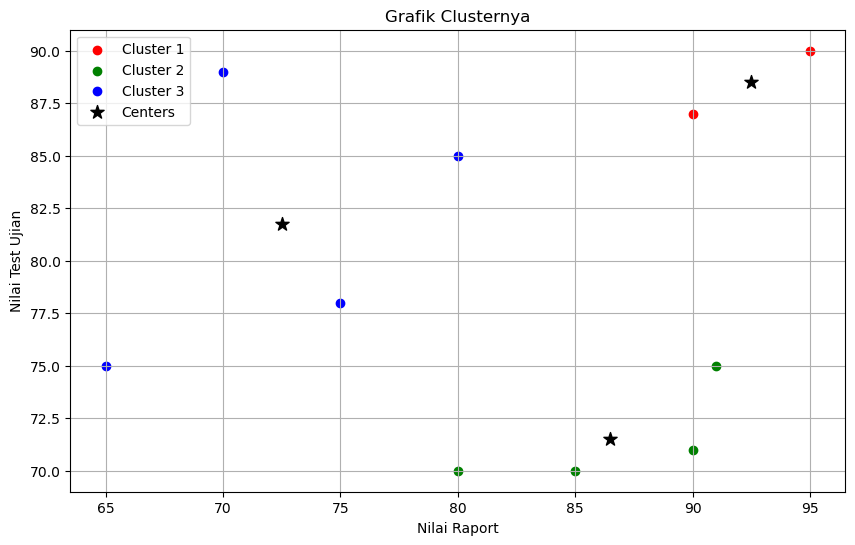

In [104]:
# Plotting the clusters
plt.figure(figsize=(10, 6))

# Colors for clusters
colors = ['red', 'green', 'blue']

# Plot each data point
for i in range(1, 4):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Nilai Raport'], cluster_data['Nilai Tes Ujian'], c=colors[i-1], label=f'Cluster {i}')

# Plot the cluster centers
plt.scatter(new_centers_3[:, 0], new_centers_3[:, 1], c='black', marker='*', s=100, label='Centers')

plt.xlabel('Nilai Raport')
plt.ylabel('Nilai Test Ujian')
plt.title('Grafik Clusternya')
plt.legend()
plt.grid(True)
plt.show()
